In [1]:
#Manipulação de dados e gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
data_05 = pd.read_csv('../dataset_csv/data_margem_05.csv', header=0)

x_column = 'load_mwh'
y_column = 'is_outlier'

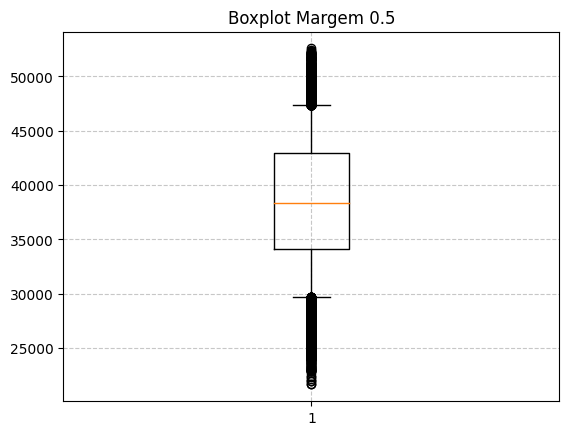

In [4]:
plt.boxplot(x=data_05[x_column], whis=0.5, labels='1')
plt.title('Boxplot Margem 0.5')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [5]:
print('Quantidade de outliers: ', len(data_05.loc[data_05[y_column] == True]))

Quantidade de outliers:  3032


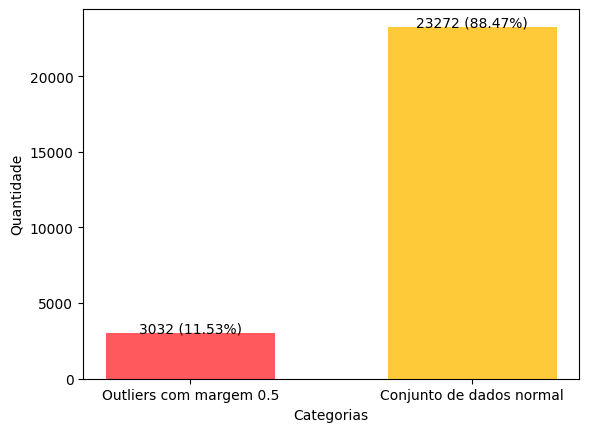

In [6]:
# Supondo que data_05 é o seu conjunto de dados com margem 0.5
# e y_column é a coluna que indica se um dado é um outlier (True) ou não (False)

total_outliers = len(data_05[data_05[y_column] == True])
total_non_outliers = len(data_05[data_05[y_column] == False])
total_data_points = total_outliers + total_non_outliers

outlier_percentage = (total_outliers / total_data_points) * 100
non_outlier_percentage = 100 - outlier_percentage

x = ['Outliers com margem 0.5', 'Conjunto de dados normal']
y = [total_outliers, total_non_outliers]

plt.bar(x=x, height=y, width=0.6, color=['#ff595e', '#ffca3a'])

for i, v in enumerate(y):
    percentage = outlier_percentage if i == 0 else non_outlier_percentage
    plt.text(i, v + 1, f'{v} ({percentage:.2f}%)', ha='center')

plt.xlabel('Categorias')
plt.ylabel('Quantidade')
#plt.title('Comparação da quantidade de utliers com o conjunto de dados normais')

plt.show()


In [ ]:
def variance_stabilization(serie, method):
    if method == 'asinh':
        return np.arcsinh(serie)
    elif method == 'log':
        return np.log(serie)
    elif method == 'mean':
        return (serie - np.mean(serie))/np.std(serie)
 
def inverseVariance_stabilization(serie, data, method):
    if method == 'asinh':
        return np.sinh(serie)
    elif method == 'log':
        return np.exp(serie)
    elif method == 'mean':
        return (serie * np.std(data)) + np.mean(data)
 

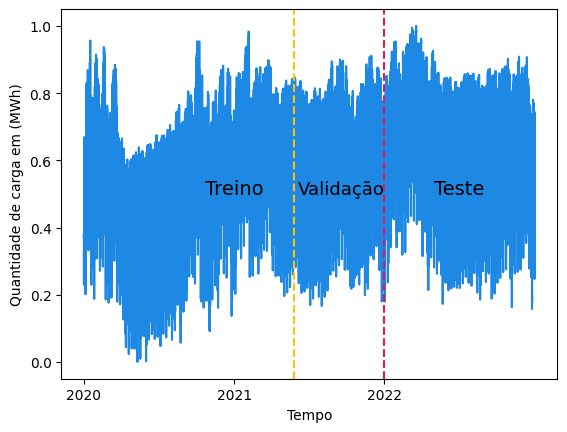

In [105]:


x_serie = data_0[x_column].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
x_serie = scaler.fit_transform(x_serie)

x_labels = ['2020', '2021', '2022']

plt.plot(x_serie, color='#1E88E5')
plt.xlabel("Tempo")
plt.ylabel("Quantidade de carga em (MWh)")

plt.xticks(range(0, len(x_serie), int(len(x_serie) / 3)), x_labels)

third_tick = 2*int(len(x_serie) / 3)
plt.axvline(x=third_tick, color='#D81B60', linestyle='dashed')

teste_tick = 0.7 * 2*int(len(x_serie) / 3)
plt.axvline(x=teste_tick, color='#FFC107', linestyle='dashed')


plt.text(third_tick/2, 0.5, "Treino", ha='center', fontsize=14)

plt.text(third_tick, 0.5, "Validação", ha='right', fontsize=13)

plt.text(third_tick + (len(x_serie) - third_tick)/2, 0.5, "Teste", ha='center', fontsize=14)

plt.show() 